In [1]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.9.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.9.2 on the current Colab Runtime...
2024-01-30 13:01:59 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.9/julia-1.9.2-linux-x86_64.tar.gz [146384758/146384758] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.9

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


In [1]:
using Pkg

In [3]:
Pkg.add(["CSV","LaTeXStrings","Interpolations","PyPlot","DataFrames","LinearAlgebra","SpecialFunctions","DifferentialEquations"]);

   Resolving package versions...
   Installed Calculus ───────────────────────── v0.5.1
   Installed StatsFuns ──────────────────────── v1.3.0
   Installed PDMats ─────────────────────────── v0.11.31
   Installed OffsetArrays ───────────────────── v1.13.0
   Installed InlineStrings ──────────────────── v1.4.0
   Installed HypergeometricFunctions ────────── v0.3.23
   Installed EnumX ──────────────────────────── v1.0.4
   Installed DifferentialEquations ──────────── v7.12.0
   Installed MutableArithmetics ─────────────── v1.4.0
   Installed Polyester ──────────────────────── v0.7.9
   Installed NonlinearSolve ─────────────────── v3.4.0
   Installed StaticArrays ───────────────────── v1.9.2
   Installed Sundials_jll ───────────────────── v5.2.1+0
   Installed MaybeInplace ───────────────────── v0.1.1
   Installed CEnum ──────────────────────────── v0.5.0
   Installed InvertedIndices ────────────────── v1.3.0
   Installed FunctionWrappers ───────────────── v1.1.3
   Installed RecursiveArr

In [4]:
using CSV
using DataFrames

In [5]:
df=DataFrame(CSV.File("/content/SM_Thermo.csv"));

In [6]:
df

Row,t (s),T_gam (MeV),T_gam/T_nu,g*,gs,a,z_gam,z_nu,N
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.00738669,10.0,1.0,10.7361,10.7358,0.0511012,1.00002,1.00002,0.000406589
2,0.00752402,9.90832,1.0,10.7361,10.7358,0.0515741,1.00002,1.00002,0.00041399
3,0.00766391,9.81748,1.0,10.7361,10.7358,0.0520513,1.00003,1.00002,0.000421497
4,0.0078064,9.72747,1.0,10.7361,10.7357,0.052533,1.00003,1.00003,0.000429132
5,0.00795154,9.63829,1.0,10.7361,10.7357,0.0530191,1.00003,1.00003,0.000436923
6,0.00809938,9.54993,1.0,10.7361,10.7357,0.0535097,1.00003,1.00003,0.000444844
7,0.00824996,9.46237,1.0,10.736,10.7357,0.0540049,1.00003,1.00003,0.000452896
8,0.00840335,9.37562,1.0,10.736,10.7357,0.0545046,1.00003,1.00003,0.000461082
9,0.00855959,9.28966,1.0,10.736,10.7356,0.055009,1.00003,1.00003,0.000469412


In [7]:
df[!,"z_gam"];

In [8]:
z_gam=df[!,"z_gam"]
z_nu=df[!,"z_nu"]
gs=df[!,"gs"]
g=df[!,"g*"];

In [9]:
z_g = (1.0 ./ z_gam) .* df[!,"a"]
m_e=0.511;

In [11]:
cons = 4.84 / m_e^2

18.535468231203158

In [12]:

function gprime_s(df)
    x = Float64[]  # Create an empty array to store the results
    for i in 1:1000  # Julia uses 1-based indexing instead of 0-based
        if z_g[i+1] != z_g[i]
            push!(x, (gs[i+1] - gs[i]) / (z_g[i+1] - z_g[i]))
        else
            push!(x, x[i])
        end
    end

    return x
end

gprime_list = gprime_s(df)
push!(gprime_list, 0.0)


1001-element Vector{Float64}:
 -0.038068983327555775
 -0.03772026444406718
 -0.03945081209273655
 -0.04114644721506389
 -0.03873069380164378
 -0.0403952856759856
 -0.04202663592989013
 -0.03965784999975411
 -0.043224171076960666
 -0.040880668638613525
 -0.04243509461875831
 -0.04395714159245324
 -0.043554168154443455
  ⋮
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

In [13]:
function my_function(cons, z_g, gprime_list, df)
    z_g_val = -(z_g^2) * (1/3) * gprime_list ./ df["gs"]
    return cons * (z_g_val + z_g) / sqrt(df["g*"])
end


my_function (generic function with 1 method)

In [14]:
using Base

z_int = sort(z_g);

In [15]:
# Calculating 'func'
func = cons .* (-(z_int .^ 2) .* (1 ./ 3) .* (gprime_list ./ df[:, "gs"]) .+ z_int) ./ (sqrt.(df[:, "g*"]))

println(func)


[0.2890859016752484, 0.2917609631025334, 0.29446175823842025, 0.2971875535464235, 0.29993656839159794, 0.30271304762339013, 0.30551524927584783, 0.30834129073992156, 0.3111966471026542, 0.3140752509376947, 0.316982660184302, 0.3199169573574058, 0.3228773399838403, 0.3258651299297684, 0.3288816821628573, 0.33192501468927876, 0.3349976666534801, 0.3380976202499318, 0.34122742254036326, 0.3443850341973858, 0.34757188752417656, 0.35079058687953385, 0.354035515205555, 0.35731290170144425, 0.36062060345854097, 0.3639589390533818, 0.3673269597918698, 0.3707261646549476, 0.3741580539347767, 0.3776217206534206, 0.381116231865866, 0.38464436310843153, 0.3882051040394765, 0.39179757935261644, 0.395424590933979, 0.39908519288811767, 0.4027783524042232, 0.4065070651210495, 0.4102702797687626, 0.41406838426130793, 0.4179002431677131, 0.4217689742527237, 0.42567351789102764, 0.42961423712787716, 0.43358999154388184, 0.43760403764866423, 0.44165674219733864, 0.4457439738648182, 0.44987056885895105, 0.

In [17]:
using Interpolations
# Interpolate using Interpolations package
dtdz = LinearInterpolation(z_int, func, extrapolation_bc=Line())  # Linear interpolation

# Create new x values
x_new = range(0.051099997600057595, stop=511.0000145934898, length=100000)

# Evaluate the interpolation at x_new values
dtdz_new = dtdz(x_new);


In [18]:
using PyPlot


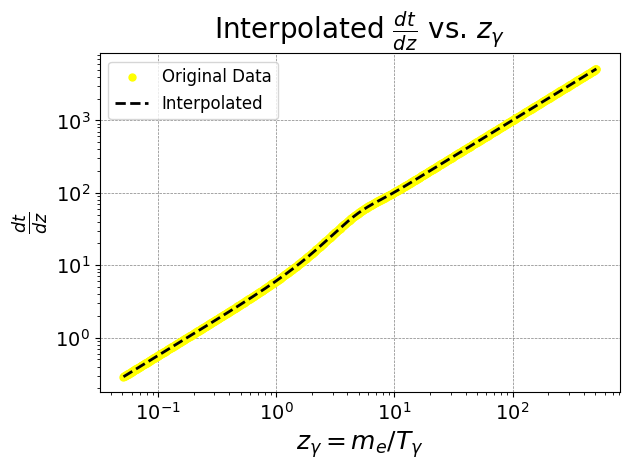

PyObject <matplotlib.legend.Legend object at 0x7a9f11ec9090>

In [19]:
plot(z_int, func, "o", color="yellow", markersize=5, label="Original Data")
plot(x_new, dtdz_new, "--", color="black", linewidth=2, label="Interpolated")
xscale("log")
yscale("log")
xlabel(L"$z_\gamma=m_e/T_\gamma$", fontsize=18)
ylabel(L"$\frac{dt}{dz}$", fontsize=18)
title(L"Interpolated $\frac{dt}{dz}$ vs. $z_{\gamma}$", fontsize=20)
grid(true, linestyle="--", linewidth=0.5, color="gray")
tick_params(axis="both", which="major", labelsize=14)
tight_layout()
legend(fontsize=12)

In [43]:
function dt_dz(z)
  if (0.051099997600057595<=z<=511)
     value=dtdz(z)
  else (z>511)
     value=(cons*z)/(sqrt(3.38321))
  end
  return(value)
end


dt_dz (generic function with 1 method)

In [45]:
a_0 = 1
a_1 = 0.15735
a_2 = 4.6172
a_3 = -0.40520e2
a_4 = 0.13875e3
a_5 = -0.59898e2
a_6 = 0.66752e2
a_7 = -0.16705e2
a_8 = 3.8071
a_9 = -0.39140
a_10 = 0.023590
a_11 = -0.83696e-4
a_12 = -0.42095e-4
a_13 = 0.17675e-5
q_np = 0.33979

b_0 = -0.62173
b_1 = 0.22211e2
b_2 = -0.72798e2
b_3 = 0.11571e3
b_4 = -0.11763e2
b_5 = 0.45521e2
b_6 = -3.7973
b_7 = 0.41266
b_8 = -0.026210
b_9 = 0.87934e-3
b_10 = -0.12016e-4
q_pn = 2.8602
tau = 8.7945e2
m_e = 0.511

a_values = [a_1, a_2, a_3, a_4, a_5, a_6, a_7, a_8, a_9, a_10, a_11, a_12, a_13]
b_values = [b_1, b_2, b_3, b_4, b_5, b_6, b_7, b_8, b_9, b_10]


10-element Vector{Float64}:
  22.211
 -72.798
 115.71
 -11.763
  45.521
  -3.7973
   0.41266
  -0.02621
   0.00087934
  -1.2016e-5

In [47]:
using Base

z_int = sort(z_g);


In [48]:
znu = []
for x in z_int
    if (1 / x) * m_e >= 0.01
        push!(znu, x)
    end
end


In [49]:
m_n= 939.57

939.57

In [50]:
# Define the weak rate function for n <--> p
function lambda_np(z)
    f1 = 1.0
    for ie in 1:13
        f1 += a_values[ie] / z^ie
    end
    f1 *= exp(-0.33979 / z) / tau
    return f1
end

# Define the weak rate function for p <--> n
function lambda_pn(z)
    r1 = -0.62173
    e = m_e / z

    if (e >= 0.1)
        for ie in 1:10
            r1 += b_values[ie] / z^ie
        end
        r1 *= exp(-2.8602 * z) / tau
        weak_rate = r1
    else
        weak_rate = 0
    end
    return weak_rate
end


lambda_pn (generic function with 1 method)

In [52]:
function fn(z, xn, xp)
    value = (lambda_pn(z) * xp - lambda_np(z) * xn ) * dt_dz(z)
    return value
end

function fp(z, xn, xp)
    value = (lambda_np(z) * xn - lambda_pn(z) * xp) * dt_dz(z)
    return value
end

fp (generic function with 1 method)

In [53]:
Pkg.add("DifferentialEquations")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [54]:
using DifferentialEquations

In [55]:
function ode_solvez(u, p, z)
    xn, xp = u
    dx_n = fn(z,u[1],u[2])  # Define the equation for dx/dt here based on x, y, and t
    dx_p = fp(z,u[1],u[2])

    [dx_n,dx_p] # Define the equation for dy/dt here based on x, y, and t
end


ode_solvez (generic function with 1 method)

In [57]:
using DifferentialEquations, BenchmarkTools
u0 = [0.46771996026; 0.53228003974]
tspan = (minimum(znu),maximum(znu))
prob = ODEProblem(ode_solvez, u0, tspan)
@btime solve(prob, Rodas5P());


  3.570 ms (100206 allocations: 2.15 MiB)


In [58]:
sol = solve(prob,Rodas5P())  # You can choose a different solver if needed

retcode: Success
Interpolation: specialized 4rd order "free" stiffness-aware interpolation
t: 46-element Vector{Float64}:
  0.051099997600057595
  0.05466814435923996
  0.05624488343348387
  0.059198347363660926
  0.06440240855496729
  0.0707912157132324
  0.07827392355528812
  0.08885976356416607
  0.10296893161866091
  0.12041302872491906
  0.13974479293618203
  0.16491750207199843
  0.19012313386995192
  ⋮
  8.187659196734879
 10.70760334713634
 13.60335906083385
 17.53340093082431
 21.54972195739339
 25.566042983962472
 29.582364010531553
 33.59868503710064
 37.76952953578549
 42.68213317985713
 49.26127039125906
 50.63151395438075
u: 46-element Vector{Vector{Float64}}:
 [0.46771996026, 0.53228003974]
 [0.46268148658713637, 0.5373185134128636]
 [0.4617833676138058, 0.5382166323861942]
 [0.46015494929715695, 0.5398450507028429]
 [0.4572267152382797, 0.5427732847617202]
 [0.45349554981022583, 0.5465044501897739]
 [0.4490540501326361, 0.5509459498673637]
 [0.4427864458906537, 0.557213

In [59]:
z_values = sol.t
xn_values = sol[1, :]
xp_values = sol[2, :]

46-element Vector{Float64}:
 0.53228003974
 0.5373185134128636
 0.5382166323861942
 0.5398450507028429
 0.5427732847617202
 0.5465044501897739
 0.5509459498673637
 0.5572135541093461
 0.5655847701492102
 0.5760350187353949
 0.5875473079972716
 0.602121526408842
 0.6161808715344376
 ⋮
 0.888690018011583
 0.9156741327318172
 0.9437222921230297
 0.9720670986945453
 0.9886198324422635
 0.996144182160754
 0.9989137415084104
 0.9997456088486629
 0.9999536994742164
 0.9999952124576214
 0.9999998693672456
 0.9999999402702865

In [60]:
xn_h=xn_values ./ xp_values

46-element Vector{Float64}:
 0.8787103128805368
 0.8610935135071778
 0.8579879175537181
 0.8523833805608948
 0.8423898671413134
 0.8298112662261933
 0.8150600802869006
 0.7946440689125133
 0.7680815551949605
 0.7360055681950752
 0.7019906080560987
 0.6607943017154277
 0.6229001031949619
 ⋮
 0.12525175227856197
 0.0920915686638498
 0.05963375915425996
 0.028735569121687402
 0.011511166561997754
 0.003870742718070187
 0.00108743973223351
 0.0002544558826627252
 4.630266962215303e-5
 4.787565299929487e-6
 1.3063277205854008e-7
 5.972971772012966e-8

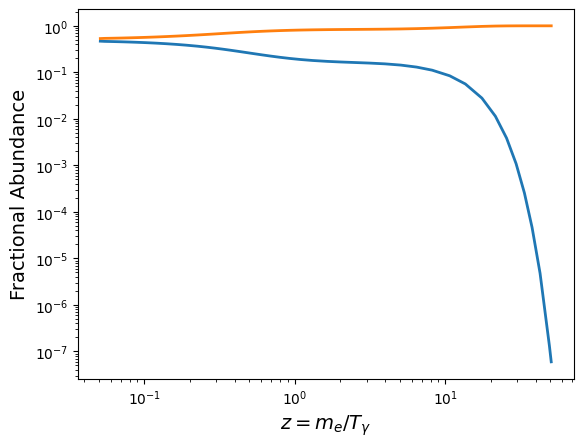

PyObject Text(29.000000000000014, 0.5, 'Fractional Abundance')

In [61]:
plot(z_values, xn_values, linewidth=2, label=L"$p$")
plot(z_values, xp_values, linewidth=2, label=L"$n$")
yscale("log")
xscale("log")
xlabel(L"$z=m_e/T_\gamma$", fontsize=14)
ylabel("Fractional Abundance", fontsize=14)

In [62]:
function mev_to_t9kelvin(mev)
    temp9_kelvin = mev * 11604525006.1598 / 10^9
    return temp9_kelvin
end


mev_to_t9kelvin (generic function with 1 method)

In [63]:
const NA=6.022e23

6.022e23

In [64]:
eta_s=6.14e-10

6.14e-10

In [65]:

m_n=939.565

939.565

In [70]:
function n_b(z)
    T_mev = m_e / z
    T_kelvin = T_mev * 11604525006.1598
    n_bz = eta_s * 410.73 * (T_kelvin / 2.7255)^3
    return n_bz
end

n_b (generic function with 1 method)

In [73]:

function pn_gammaD(z)
    T = m_e / z
    T_9 = mev_to_t9kelvin(T)
    if T_9 <= 1.5
        f = (44216. * (1 + 3.75191 * T_9 + 1.92934 * T_9^2 + 0.746503 * T_9^3 + 0.0197023 * T_9^4 + 3.00491e-6 * T_9^5) /
             (1 + 5.4678 * T_9 + 5.62395 * T_9^2 + 0.489312 * T_9^3 + 0.00747806 * T_9^4))
    else
        f = (1.0 - sqrt(T_9) * 0.8504 + T_9 * 0.4895 - T_9^(3/2) * 0.09623 + T_9 * 0.008471 * T_9 - T_9 * 2.8e-4 * T_9^(3/2)) * 47420.0
    end
    result = f
    return n_b(z) * (result / NA)
end


function Dp_gamma3He(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)
    if T9 < 0.001
        rate = 4.815e-14
    elseif 0.001 <= T9 <= 0.0015
        rate = 4.815e-14
    elseif 0.0015 < T9 <= 0.0025
        rate = 6.409e-9
    elseif 0.0025 < T9 <= 0.0035
        rate = 4.525e-7
    elseif 0.0035 < T9 <= 0.0045
        rate = 4.896e-6
    elseif 0.0045 < T9 <= 0.0055
        rate = 2.444e-5
    elseif 0.0055 < T9 <= 0.0065
        rate = 8.086e-5
    elseif 0.0065 < T9 <= 0.0075
        rate = 2.078e-4
    elseif 0.0075 < T9 <= 0.0085
        rate = 4.499e-4
    elseif 0.0085 < T9 <= 0.0095
        rate = 8.619e-4
    elseif 0.0095 < T9 <= 0.0105
        rate = 1.506e-3
    elseif 0.0105 < T9 <= 0.0115
        rate = 2.450e-3
    elseif 0.0115 < T9 <= 0.0125
        rate = 3.767e-3
    elseif 0.0125 < T9 <= 0.0135
        rate = 5.531e-3
    elseif 0.0135 < T9 <= 0.0145
        rate = 7.816e-3
    elseif 0.0145 < T9 <= 0.0155
        rate = 1.070e-2
    elseif 0.0155 < T9 <= 0.0170
        rate = 1.425e-2
    elseif 0.0170 < T9 <= 0.0190
        rate = 2.366e-2
    elseif 0.0190 < T9 <= 0.0225
        rate = 3.659e-2
    elseif 0.0225 < T9 <= 0.0275
        rate = 8.753e-2
    elseif 0.0275 < T9 <= 0.0350
        rate = 1.701e-1
    elseif 0.0350 < T9 <= 0.0450
        rate = 4.476e-1
    elseif 0.0450 < T9 <= 0.0550
        rate = 8.915e-1
    elseif 0.0550 < T9 <= 0.0650
        rate = 1.510
    elseif 0.0650 < T9 <= 0.0750
        rate = 2.302
    elseif 0.0750 < T9 <= 0.0850
        rate = 3.265
    elseif 0.0850 < T9 <= 0.0950
        rate = 4.392
    elseif 0.0950 < T9 <= 0.1050
        rate = 5.676
    elseif 0.1050 < T9 <= 0.1150
        rate = 7.109
    elseif 0.1150 < T9 <= 0.1250
        rate = 8.685
    elseif 0.1250 < T9 <= 0.1350
        rate = 1.040e1
    elseif 0.1350 < T9 <= 0.1450
        rate = 1.224e1
    elseif 0.1450 < T9 <= 0.1550
        rate = 1.420e1
    elseif 0.1550 < T9 <= 0.1700
        rate = 1.628e1
    elseif 0.1700 < T9 <= 0.1900
        rate = 2.076e1
    elseif 0.1900 < T9 <= 0.2250
        rate = 2.565e1
    elseif 0.2250 < T9 <= 0.2750
        rate = 3.941e1
    elseif 0.2750 < T9 <= 0.3250
        rate = 5.505e1
    elseif 0.3250 < T9 <= 0.3750
        rate = 7.225e1
    elseif 0.3750 < T9 <= 0.4250
        rate = 9.076e1
    elseif 0.4250 < T9 <= 0.4750
        rate = 1.104e2
    elseif 0.4750 < T9 <= 0.5500
        rate = 1.310e2
    elseif 0.5500 < T9 <= 0.6500
        rate = 1.748e2
    elseif 0.6500 < T9 <= 0.7500
        rate = 2.212e2
    elseif 0.7500 < T9 <= 0.8500
        rate = 2.700e2
    elseif 0.8500 < T9 <= 0.9500
        rate = 3.207e2
    elseif 0.9500 < T9 <= 1.1250
        rate = 3.729e2
    elseif 1.1250 < T9 <= 1.3750
        rate = 5.093e2
    elseif 1.3750 < T9 <= 1.6250
        rate = 6.522e2
    elseif 1.6250 < T9 <= 1.8750
        rate = 8.000e2
    elseif 1.8750 < T9 <= 2.2500
        rate = 9.517e2
    elseif 2.2500 < T9 <= 2.7500
        rate = 1.265e3
    elseif 2.7500 < T9 <= 3.2500
        rate = 1.587e3
    elseif 3.2500 < T9 <= 3.7500
        rate = 1.914e3
    elseif 3.7500 < T9 <= 4.5000
        rate = 2.244e3
    elseif 4.5000 < T9 <= 5.5000
        rate = 2.905e3
    elseif 5.5000 < T9 <= 6.5000
        rate = 3.557e3
    elseif 6.5000 < T9 <= 7.5000
        rate = 4.194e3
    elseif 7.5000 < T9 <= 8.5000
        rate = 4.812e3
    elseif 8.5000 < T9 <= 9.5000
        rate = 5.410e3
    elseif 9.5000 < T9 <= 10.0000
        rate = 5.988e3
    else
        rate = 0.0
    end
    return (n_b(z)*rate / NA)
end



function DD_n3He(z)
    T9 = mev_to_t9kelvin(m_e / z)
    if T9 < 0.001
        rate = 1.142e-8
    elseif 0.001 <= T9 <= 0.0015
        rate = 1.142e-8
    elseif 0.0015 < T9 <= 0.0025
        rate = 5.470e-5
    elseif 0.0025 < T9 <= 0.0035
        rate = 3.021e-3
    elseif 0.0035 < T9 <= 0.0045
        rate = 3.732e-2
    elseif 0.0045 < T9 <= 0.0055
        rate = 2.212e-1
    elseif 0.0055 < T9 <= 0.0065
        rate = 8.546e-1
    elseif 0.0065 < T9 <= 0.0075
        rate = 2.505
    elseif 0.0075 < T9 <= 0.0085
        rate = 6.066
    elseif 0.0085 < T9 <= 0.0095
        rate = 1.278e1
    elseif 0.0095 < T9 <= 0.0105
        rate = 2.424e1
    elseif 0.0105 < T9 <= 0.0115
        rate = 4.237e1
    elseif 0.0115 < T9 <= 0.0125
        rate = 6.936e1
    elseif 0.0125 < T9 <= 0.0135
        rate = 1.077e2
    elseif 0.0135 < T9 <= 0.0145
        rate = 1.600e2
    elseif 0.0145 < T9 <= 0.0155
        rate = 2.291e2
    elseif 0.0155 < T9 <= 0.0170
        rate = 3.179e2
    elseif 0.0170 < T9 <= 0.0190
        rate = 5.667e2
    elseif 0.0190 < T9 <= 0.0225
        rate = 9.310e2
    elseif 0.0225 < T9 <= 0.0275
        rate = 2.504e3
    elseif 0.0275 < T9 <= 0.0350
        rate = 5.301e3
    elseif 0.0350 < T9 <= 0.0450
        rate = 1.568e4
    elseif 0.0450 < T9 <= 0.0550
        rate = 3.369e4
    elseif 0.0550 < T9 <= 0.0650
        rate = 6.013e4
    elseif 0.0650 < T9 <= 0.0750
        rate = 9.527e4
    elseif 0.0750 < T9 <= 0.0850
        rate = 1.390e5
    elseif 0.0850 < T9 <= 0.0950
        rate = 1.912e5
    elseif 0.0950 < T9 <= 0.1050
        rate = 2.513e5
    elseif 0.1050 < T9 <= 0.1150
        rate = 3.190e5
    elseif 0.1150 < T9 <= 0.1250
        rate = 3.938e5
    elseif 0.1250 < T9 <= 0.1350
        rate = 4.753e5
    elseif 0.1350 < T9 <= 0.1450
        rate = 5.631e5
    elseif 0.1450 < T9 <= 0.1550
        rate = 6.568e5
    elseif 0.1550 < T9 <= 0.1700
        rate = 7.559e5
    elseif 0.1700 < T9 <= 0.1900
        rate = 9.691e5
    elseif 0.1900 < T9 <= 0.2250
        rate = 1.200e6
    elseif 0.2250 < T9 <= 0.2750
        rate = 1.842e6
    elseif 0.2750 < T9 <= 0.3250
        rate = 2.555e6
    elseif 0.3250 < T9 <= 0.3750
        rate = 3.318e6
    elseif 0.3750 < T9 <= 0.4250
        rate = 4.119e6
    elseif 0.4250 < T9 <= 0.4750
        rate = 4.946e6
    elseif 0.4750 < T9 <= 0.5500
        rate = 5.792e6
    elseif 0.5500 < T9 <= 0.6500
        rate = 7.517e6
    elseif 0.6500 < T9 <= 0.7500
        rate = 9.260e6
    elseif 0.7500 < T9 <= 0.8500
        rate = 1.100e7
    elseif 0.8500 < T9 <= 0.9500
        rate = 1.272e7
    elseif 0.9500 < T9 <= 1.1250
        rate = 1.442e7
    elseif 1.1250 < T9 <= 1.3750
        rate = 1.850e7
    elseif 1.3750 < T9 <= 1.6250
        rate = 2.235e7
    elseif 1.6250 < T9 <= 1.8750
        rate = 2.595e7
    elseif 1.8750 < T9 <= 2.2500
        rate = 2.932e7
    elseif 2.2500 < T9 <= 2.7500
        rate = 3.546e7
    elseif 2.7500 < T9 <= 3.2500
        rate = 4.093e7
    elseif 3.2500 < T9 <= 3.7500
        rate = 4.585e7
    elseif 3.7500 < T9 <= 4.5000
        rate = 5.031e7
    elseif 4.5000 < T9 <= 5.5000
        rate = 5.816e7
    elseif 5.5000 < T9 <= 6.5000
        rate = 6.488e7
    elseif 6.5000 < T9 <= 7.5000
        rate = 7.072e7
    elseif 7.5000 < T9 <= 8.5000
        rate = 7.583e7
    elseif 8.5000 < T9 <= 9.5000
        rate = 8.037e7
    elseif 9.5000 < T9 <= 10.0000
        rate = 8.437e7
    else
        rate = 0.0
    end
    return (n_b(z)*rate / NA)
end



function DD_p3H(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)

    if T9 < 0.001
        rate = 1.173e-8
    elseif 0.001 <= T9 <= 0.0015
        rate = 1.173e-8
    elseif 0.0015 < T9 <= 0.0025
        rate = 5.609e-5
    elseif 0.0025 < T9 <= 0.0035
        rate = 3.092e-3
    elseif 0.0035 < T9 <= 0.0045
        rate = 3.814e-2
    elseif 0.0045 < T9 <= 0.0055
        rate = 2.257e-1
    elseif 0.0055 < T9 <= 0.0065
        rate = 8.707e-1
    elseif 0.0065 < T9 <= 0.0075
        rate = 2.549
    elseif 0.0075 < T9 <= 0.0085
        rate = 6.164
    elseif 0.0085 < T9 <= 0.0095
        rate = 1.297e1
    elseif 0.0095 < T9 <= 0.0105
        rate = 2.458e1
    elseif 0.0105 < T9 <= 0.0115
        rate = 4.290e1
    elseif 0.0115 < T9 <= 0.0125
        rate = 7.016e1
    elseif 0.0125 < T9 <= 0.0135
        rate = 1.088e2
    elseif 0.0135 < T9 <= 0.0145
        rate = 1.615e2
    elseif 0.0145 < T9 <= 0.0155
        rate = 2.310e2
    elseif 0.0155 < T9 <= 0.0170
        rate = 3.202e2
    elseif 0.0170 < T9 <= 0.0190
        rate = 5.698e2
    elseif 0.0190 < T9 <= 0.0225
        rate = 9.343e2
    elseif 0.0225 < T9 <= 0.0275
        rate = 2.502e3
    elseif 0.0275 < T9 <= 0.0350
        rate = 5.276e3
    elseif 0.0350 < T9 <= 0.0450
        rate = 1.549e4
    elseif 0.0450 < T9 <= 0.0550
        rate = 3.307e4
    elseif 0.0550 < T9 <= 0.0650
        rate = 5.868e4
    elseif 0.0650 < T9 <= 0.0750
        rate = 9.246e4
    elseif 0.0750 < T9 <= 0.0850
        rate = 1.343e5
    elseif 0.0850 < T9 <= 0.0950
        rate = 1.837e5
    elseif 0.0950 < T9 <= 0.1050
        rate = 2.404e5
    elseif 0.1050 < T9 <= 0.1150
        rate = 3.039e5
    elseif 0.1150 < T9 <= 0.1250
        rate = 3.737e5
    elseif 0.1250 < T9 <= 0.1350
        rate = 4.493e5
    elseif 0.1350 < T9 <= 0.1450
        rate = 5.304e5
    elseif 0.1450 < T9 <= 0.1550
        rate = 6.165e5
    elseif 0.1550 < T9 <= 0.1700
        rate = 7.072e5
    elseif 0.1700 < T9 <= 0.1900
        rate = 9.011e5
    elseif 0.1900 < T9 <= 0.2250
        rate = 1.110e6
    elseif 0.2250 < T9 <= 0.2750
        rate = 1.682e6
    elseif 0.2750 < T9 <= 0.3250
        rate = 2.309e6
    elseif 0.3250 < T9 <= 0.3750
        rate = 2.974e6
    elseif 0.3750 < T9 <= 0.4250
        rate = 3.663e6
    elseif 0.4250 < T9 <= 0.4750
        rate = 4.371e6
    elseif 0.4750 < T9 <= 0.5500
        rate = 5.089e6
    elseif 0.5500 < T9 <= 0.6500
        rate = 6.543e6
    elseif 0.6500 < T9 <= 0.7500
        rate = 8.001e6
    elseif 0.7500 < T9 <= 0.8500
        rate = 9.448e6
    elseif 0.8500 < T9 <= 0.9500
        rate = 1.087e7
    elseif 0.9500 < T9 <= 1.1250
        rate = 1.228e7
    elseif 1.1250 < T9 <= 1.3750
        rate = 1.565e7
    elseif 1.3750 < T9 <= 1.6250
        rate = 2.882e7
    elseif 1.6250 < T9 <= 1.8750
        rate = 2.181e7
    elseif 1.8750 < T9 <= 2.2500
        rate = 2.461e7
    elseif 2.2500 < T9 <= 2.7500
        rate = 2.976e7
    elseif 2.7500 < T9 <= 3.2500
        rate = 3.440e7
    elseif 3.2500 < T9 <= 3.7500
        rate = 3.863e7
    elseif 3.7500 < T9 <= 4.5000
        rate = 4.251e7
    elseif 4.5000 < T9 <= 5.5000
        rate = 4.946e7
    elseif 5.5000 < T9 <= 6.5000
        rate = 5.552e7
    elseif 6.5000 < T9 <= 7.5000
        rate = 6.077e7
    elseif 7.5000 < T9 <= 8.5000
        rate = 6.529e7
    elseif 8.5000 < T9 <= 9.5000
        rate = 6.912e7
    elseif 9.5000 < T9 <= 10.0000
        rate = 7.228e7
    else
        rate = 0.0
    end

    rate =rate/NA
    return (n_b(z)*rate)
end

function n3He_p3h(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)

    if T9 < 2.5
        rate = (7.064935e8 + 6.733213571736319e8 * T9 + 1.7181155480346258e9 * T9 * T9 -
                4.5367658146835446e8 * T9 * T9 * T9 - 1.2216728981712557e8 * T9^4 -
                4.92736677238425e8 * sqrt(T9) - 1.3659670893994067e9 * T9^(3/2) -
                6.629932739639357e8 * T9^(5/2) + 4.834951929033479e8 * T9^(7/2))
    else
        rate = 4.81732e8
    end

    return (n_b(z)*rate / NA)
end

function D3H_4Hen(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)

    if T9 < 2.5
        factor1 = 6.2265733e8 / (exp(0.49711597 / T9) * T9^0.56785403)
        factor2 = exp(-0.23309803 * T9^2 - 1.342742 * T9^(-1/3))
        factor3 = (-8.1144927e7 + 2.2315324e9 * T9 - 2.9439669e9 * T9^2
                   + 1.8764462e9 * T9^3 - 6.0511612e8 * T9^4
                   + 9.5196576e7 * T9^5
                   - 5.2901086e6 * T9^6) * T9^(-2/3)
        rate = factor1 + factor2 * factor3
    else
        rate = 3.40249e8
    end

    return (n_b(z)*rate / NA)
end

function D3He_p4He(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)

    if T9 < 2.5
        factor1 = 3.1038385e8 / (exp(1.6190981 / T9) * T9^0.12159455)
        factor2 = exp(-0.0062340825 * T9^2 - 1.4540617 * T9^(-1/3))
        factor3 = (-3.1335916e7 - 6.2051071e8 * T9 - 1.8782248e9 * T9^2
                   + 6.5642773e8 * T9^3 + 1.530887e8 * T9^4
                   - 4.9542138e8 * T9^(10/3)
                   - 1.770285e8 * T9^(11/3) + 1.14185e8 * T9^(1/3)
                   - 2.516526e7 * T9^(13/3) + 1.7500204e8 * T9^(2/3)
                   - 1.7513362e9 * T9^(4/3) + 5.2792247e9 * T9^(5/3)
                   - 3.32382e9 * T9^(7/3) + 2.0346284e9 * T9^(8/3)) * T9^(-2/3)
        rate = factor1 + factor2 * factor3
    else
        rate = 1.55167e8
    end

    return (n_b(z)*rate / NA)
end


function n_chigamma(z)
  omega=(m_n/2)*(1-(m_chi/m_n)^2)
  rate=4.6e-7*((theta/(1e-10))^2)*(omega^3)
  return(rate)
end



n_chigamma (generic function with 1 method)

In [75]:

  # Importing the necessary package

function threegamma_1two(sigma_v_ab, T, mu_ab, ga, gb, gc, Q)
    c_gamma = (T / (2 * π))^(3 / 2) * (mu_ab)^(3 / 2) * (ga * gb / gc) * exp(-Q / T)
    ngamma_sigma_v_cgamma = sigma_v_ab * c_gamma
    return ngamma_sigma_v_cgamma
end

function sigma_v_cd(sigma_v_ab, T, mu_ab, mu_cd, ga, gb, gc, gd, Q)
    ratio_rate = (mu_ab / mu_cd)^(3 / 2) * ((ga * gb) / (gc * gd)) * exp(-Q / T)
    sigma_cd = sigma_v_ab * ratio_rate
    return sigma_cd
end



sigma_v_cd (generic function with 1 method)

In [76]:
using SpecialFunctions

In [77]:
function pn_gammaD_reverse(z)
    T=m_e/z
    T9=mev_to_t9kelvin(T)
    alpha = 4.71614e+09
    beta = 1.5
    gamma = -25.815
    reverse_rate = alpha * T9^beta * exp(gamma / T9) * (pn_gammaD(z) * (NA / n_b(z)))
    return reverse_rate
end



function Dp_gamma3He_reverse(z)
    T=m_e/z
    T9=mev_to_t9kelvin(T)
    alpha = 1.6335e+10
    beta = 1.5
    gamma = -63.7491
    reverse_rate =  alpha * T9^beta * exp(gamma / T9) * (Dp_gamma3He(z) * (NA / n_b(z)))
    return reverse_rate
end


function DD_n3He_reverse(z)
    T=m_e/z
    T9=mev_to_t9kelvin(T)
    alpha = 1.73183e+00
    beta = 0
    gamma = -37.9341
    reverse_rate =  alpha * T9^beta * exp(gamma / T9) * (DD_n3He(z))
    return reverse_rate
end


function DD_p3H_reverse(z)
    T=m_e/z
    T9=mev_to_t9kelvin(T)
    alpha = 1.73492e+00
    beta = 0
    gamma = -46.7971
    reverse_rate =  alpha * T9^beta * exp(gamma / T9) * (DD_p3H(z))
    return reverse_rate
end

function n3He_p3h_reverse(z)
    T=m_e/z
    T9=mev_to_t9kelvin(T)
    alpha = 1.00178e+00
    beta = 0.0
    gamma = -8.8630
    reverse_rate =  alpha * T9^beta * exp(gamma / T9) * (n3He_p3h(z))
    return reverse_rate
end


function D3H_4Hen_reverse(z)
    T=m_e/z
    T9=mev_to_t9kelvin(T)
    alpha = 5.5369e+00
    beta = 0
    gamma = -204.1236
    reverse_rate =  alpha * T9^beta * exp(gamma / T9) * (D3H_4Hen(z))
    return reverse_rate
end

function D3He_p4He_reverse(z)
    T=m_e/z
    T9=mev_to_t9kelvin(T)
    alpha = 5.5438e+00
    beta = 0
    gamma = -212.987
    reverse_rate =  alpha * T9^beta * exp(gamma / T9) * (D3He_p4He(z))
    return reverse_rate
end

function n_chigamma_reverse(z)
    T=m_e/z
    reverse_rate=(n_chigamma(z))/(exp((m_n-m_chi)/T)-1)
    return reverse_rate
end


n_chigamma_reverse (generic function with 1 method)

In [78]:
function BRnchig(z)
   branching_ratio=n_chigamma(z)/(n_chigamma(z)+1/tau)
   return branching_ratio
end


function BRnp(z)
   branching_ratio= 1-BRnchig(z)
   return branching_ratio
end

BRnp (generic function with 1 method)

In [80]:

# T-1
function coff_gammaD_pn(z,xn,xp,xd)
    return (pn_gammaD_reverse(z) * xd - pn_gammaD(z) * xp * xn)
end

# T-2
function coff_gamma3He_Dp(z,x_3He,xd,xp)
    return (Dp_gamma3He_reverse(z) * x_3He - Dp_gamma3He(z) * xd * xp)
end

# T-3
function coff_DD_p3H(z,xd,xp,x_3H)
    return (DD_p3H(z) * xd^2/2  - DD_p3H_reverse(z) * xp * x_3H)
end

# T-4
function coff_n3he_p3h(z,xn,x_3He,x_3H,xp)
    return (n3He_p3h(z) * x_3He * xn - n3He_p3h_reverse(z) * xp * x_3H)
end

# T-5
function coff_D3He_p4He(z,x_3He,xd,xp,x_4He)
    return (D3He_p4He(z) * x_3He * xd - D3He_p4He_reverse(z) * xp * x_4He)
end

# T-6
function coff_DD_n3He(z,xd,xn,x_3He)
    return (DD_n3He(z) * xd^2/2 - DD_n3He_reverse(z) * xn * x_3He)
end

# T-7
function coff_D3H_4Hen(z,xd,x_3H,x_4He,xn)
    return (D3H_4Hen(z) * x_3H * xd - D3H_4Hen_reverse(z) * xn * x_4He)
end

#T-8
function coff_n_chigamma(z,xn,x_chi)
    T=m_e/z
    return((BRnchig(z)/tau)*xn - (exp((m_n-m_chi)/T)-1)^(-1)*(BRnchig(z)/tau)*x_chi)
end


coff_n_chigamma (generic function with 1 method)

In [81]:
function xp_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (BRnp(z)*(lambda_np(z) * xn - lambda_pn(z)* xp) + coff_gammaD_pn(z, xn, xp, xd) + coff_gamma3He_Dp(z, x_3He, xd, xp) +
             coff_DD_p3H(z, xd, xp, x_3H) + coff_n3he_p3h(z, xn, x_3He, x_3H, xp) + coff_D3He_p4He(z, x_3He, xd, xp, x_4He)) * dt_dz(z)
    return value
end

function xn_rates(z,xn,xp,xd,x_3H,x_3He,x_4He,x_chi)
    value = (BRnp(z)*(lambda_pn(z) * xp - lambda_np(z) * xn) + coff_gammaD_pn(z, xn, xp, xd) + coff_DD_n3He(z, xd, xn, x_3He) - coff_n3he_p3h(z, xn, x_3He, x_3H, xp) +
             coff_D3H_4Hen(z, xd, x_3H, x_4He, xn)-coff_n_chigamma(z,xn,x_chi)) * dt_dz(z)
    return value
end

function xd_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (-coff_gammaD_pn(z, xn, xp, xd) + coff_gamma3He_Dp(z, x_3He, xd, xp) + 2*(-coff_DD_n3He(z, xd, xn, x_3He)) + 2*(-coff_DD_p3H(z, xd, xp, x_3H)) -
             coff_D3H_4Hen(z, xd, x_3H, x_4He, xn) - coff_D3He_p4He(z, x_3He, xd, xp, x_4He)) * dt_dz(z)
    return value
end

function x3H_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (coff_DD_p3H(z, xd, xp, x_3H) + coff_n3he_p3h(z, xn, x_3He, x_3H, xp) - coff_D3H_4Hen(z, xd, x_3H, x_4He, xn)) * dt_dz(z)
    return value
end

function x3He_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (-coff_gamma3He_Dp(z, x_3He, xd, xp) + coff_DD_n3He(z, xd, xn, x_3He) - coff_n3he_p3h(z, xn, x_3He, x_3H, xp) - coff_D3He_p4He(z, x_3He, xd, xp, x_4He)) * dt_dz(z)
    return value
end

function x4He_rates(z,xn,xp,xd,x_3H,x_3He,x_4He)
    value = (coff_D3He_p4He(z, x_3He, xd, xp, x_4He)+coff_D3H_4Hen(z, xd, x_3H, x_4He, xn)) * dt_dz(z)
    return value
end

function xchi_rates(z,xn,x_chi)
   value = (coff_n_chigamma(z,xn,x_chi))*dt_dz(z)
   return value
end

xchi_rates (generic function with 1 method)

In [82]:
  function Xp_in(z)
    initial_val = 1 / (exp(-2.530 * z) + 1)
    return initial_val
end

function Xn_in(z)
    initial_val = 1 / (exp(2.530 * z) + 1)
    return initial_val
end


Xn_in (generic function with 1 method)

In [83]:
using SpecialFunctions

function Xi(z_in, g_i, Ai, m_e, m_p, m_n, MN, eta_i, Bi, Zi)
    Xp = Xp_in(z_in)
    Xn = Xn_in(z_in)

    term1 = g_i / 2
    term2 = (zeta(3) * sqrt(8 / π))^(Ai - 1)
    term3 = (MN / (m_p^Zi * m_n^(Ai - Zi)))^(3 / 2)
    term4 = (m_e / z_in)^(3 / 2) * (Ai - 1)
    term5 = eta_i^(Ai - 1)
    term6 = Xp^Zi
    term7 = Xn^(Ai - Zi)
    term8 = exp(Bi * z_in)

    result = term1 * term2 * term3 * term4 * term5 * term6 * term7 * term8

    return result
end



Xi (generic function with 1 method)

In [84]:

using LinearAlgebra
#z_evolve = LinRange(0.1,51.0, 1000)
z_evolve = LinRange(m_e/10,100, 100)

100-element LinRange{Float64, Int64}:
 0.0511, 1.06068, 2.07027, 3.07985, 4.08944, …, 95.9617, 96.9712, 97.9808, 98.9904, 100.0

In [85]:
eta_val=LinRange(1.e-10,1.e-9,100)

100-element LinRange{Float64, Int64}:
 1.0e-10, 1.09091e-10, 1.18182e-10, 1.27273e-10, …, 9.72727e-10, 9.81818e-10, 9.90909e-10, 1.0e-9

In [ ]:
#xp_rate(z, xn, xp, xd, x_3He, x_3H, x_4He)
#xn_rate(z, xp, xn, xd, x_3He, x_3H, x_4He)
#1=p
#2=n
#3=d
#4=3H
#5=3He
#6=4He

In [86]:
function dYdz(u,p,z)
    xn,xp,xd,x_3H,x_3He,x_4He,x_chi = u
    dxn=xn_rates(z,u[1],u[2],u[3],u[4],u[5],u[6],u[7])
    dxp=xp_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    dxd=xd_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    dx3h=x3H_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    dx3he=x3He_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    dx4he=x4He_rates(z,u[1],u[2],u[3],u[4],u[5],u[6])
    dxchi=xchi_rates(z,u[1],u[7])
    return [dxn,dxp,dxd,dx3h,dx3he,dx4he,dxchi]
end


dYdz (generic function with 1 method)

In [87]:
#xd=3.3523
#2.22
#m_n = 939.56542052 # neutron mass in [MeV], PDG
m_p = 938.27208816 # proton mass in [MeV], PDG
m_n= 939.565
m_chi=m_n-1
theta=3e-9

3.0e-9

In [ ]:
using DifferentialEquations, BenchmarkTools
alpha_val=[]
d_val=[]
he3_val=[]
h_val=[]
for i in eta_val
    eta_s=i
    xd0 = Xi(minimum(z_evolve), 3, 2, m_e, m_p, m_n, 1875.62,eta_s, 4.3524, 1)
    x3h0 = Xi(minimum(z_evolve), 2, 3, m_e, m_p, m_n, 2809.45,eta_s, 16.598, 1)
    x3he0 = Xi(minimum(z_evolve), 2, 3, m_e,m_p, m_n, 2809.431,eta_s, 15.1039, 2)
    x4he0 = Xi(minimum(z_evolve), 1, 4, m_e, m_p, m_n, 3728.42,eta_s, 55.37, 2)
    x1_0=Xn_in(minimum(z_evolve))
    x2_0=Xp_in(minimum(z_evolve))
    x3_0=xd0
    x4_0=x3h0
    x5_0=x3he0
    x6_0=x4he0
    x7_0=5.4*(x1_0+x2_0)
    u0=[x1_0,x2_0,x3_0,x4_0,x5_0,x6_0,x7_0]
    tspan = (minimum(z_evolve),maximum(z_evolve))
    prob = ODEProblem(dYdz, u0, tspan)
    sol_y=solve(prob,FBDF(),reltol=1e-6,abstol=1e-8)
    xp_val = sol_y[2, :]
    x4he_val = sol_y[6, :]
    xd_val = sol_y[3, :]
    x3he_val = sol_y[5, :]
    push!(alpha_val,x4he_val[end])
    push!(d_val,xd_val[end])
    push!(he3_val,x3he_val[end])
    push!(h_val,xp_val[end])
end

In [ ]:
alpha_val[61]*4.002603

LoadError: UndefVarError: `alpha_val` not defined

In [ ]:
alpha_val[100]*4.002603

LoadError: UndefVarError: `alpha_val` not defined

### References
* [Planck 2018 results. VI. Cosmological parameters](https://arxiv.org/pdf/1807.06209.pdf)
* [E. Aver et al. (arxiv)](https://arxiv.org/pdf/2010.04180.pdf)
* [PDG :- Astrophysical Constants](https://pdg.lbl.gov/2023/web/viewer.html?file=../reviews/rpp2022-rev-astrophysical-constants.pdf)
* [PDG:- BBN](https://pdg.lbl.gov/2023/reviews/contents_sports.html)



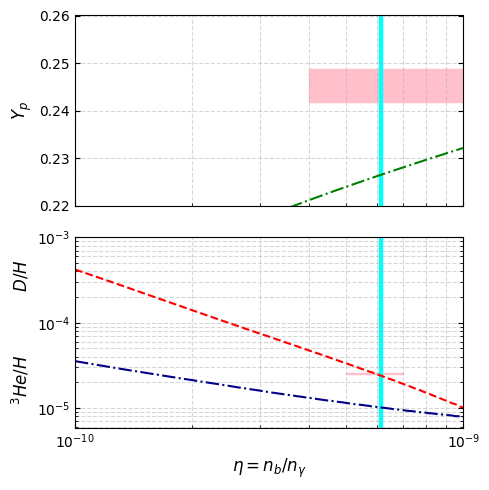

In [ ]:
fig, (ax3, ax4) = subplots(2, sharex=true,figsize=(5,5))
ax3.plot(eta_val,4.002602*alpha_val,color="green","-.")
ax3.set_xlim(1.e-10,1.e-9)
ax3.set_ylim(0.22,0.26)
ax3.set_xscale("log")
ax3.set_yticks([0.23,0.24,0.25,0.26],minor=true)
#ax3.set_xlabel(L"\eta=n_{b}/n_{\gamma}",fontsize=12)
ax3.set_ylabel(L"Y_{p}",fontsize=12)
ax3.grid("True", which="both", linestyle="--", alpha=0.5)
ax3.fill_between([4e-10,1e-9],0.2419,0.2487,color="pink")
ax3.fill_betweenx([0.22,0.26],6.08e-10,6.168e-10,color="cyan")
ax3.tick_params(axis="both", which="both", direction="in", right=true)




ax4.plot(eta_val, d_val ./ h_val, color="red", linestyle="--")
ax4.plot(eta_val, he3_val ./ h_val, color="darkblue", linestyle="-.")
ax4.set_xlim(1e-10, 1e-9)
ax4.set_ylim(5.9e-6, 1e-3)
ax4.set_xscale("log")
ax4.set_yscale("log")
ax4.set_yticks([1e-3, 1e-4, 1e-5])
ax4.set_xlabel(L"\eta=n_{b}/n_{\gamma}",fontsize=12)
ax4.set_ylabel(L"^{3}He/H\ \ \ \ \ \ \ \ \ \  \ \  D/H",fontsize=12)
ax4.grid("True", which="both", linestyle="--", alpha=0.5)
ax4.fill_between([5e-10, 7e-10], 2.497e-5, 2.557e-5, color="pink")
ax4.fill_betweenx([5.9e-6, 1e-3], 6.08e-10, 6.168e-10, color="cyan", label="planck")
ax4.tick_params(axis="both", which="both", direction="in", right=true)

fig.tight_layout()
fig.savefig("my_plot.svg")
show()


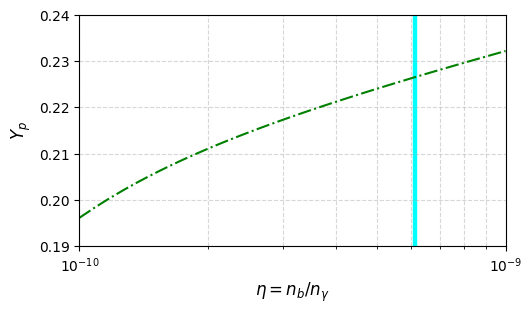

PyObject <matplotlib.collections.PolyCollection object at 0x7f940749a500>

In [ ]:
fig, ax2 = subplots(figsize=(5.5,3))
ax2.plot(eta_val,4.002602*alpha_val,color="green","-.")
ax2.set_xlim(1.e-10,1.e-9)
ax2.set_ylim(0.19,0.24)
ax2.set_xscale("log")
ax2.set_yticks([0.19,0.20,0.21,0.22,0.23,0.24])
ax2.set_xlabel(L"\eta=n_{b}/n_{\gamma}",fontsize=12)
ax2.set_ylabel(L"Y_{p}",fontsize=12)
ax2.grid("True", which="both", linestyle="--", alpha=0.5)
ax2.fill_between([4e-10,1e-9],0.2419,0.2487,color="pink")
ax2.fill_betweenx([0.19,0.24],6.08e-10,6.168e-10,color="cyan")

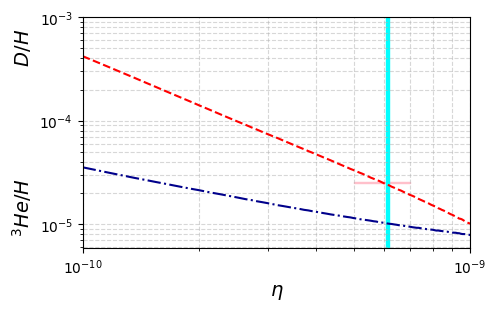

PyObject <matplotlib.collections.PolyCollection object at 0x7f940768c5b0>

In [ ]:
fig, ax2 = subplots(figsize=(5,3))
ax2.plot(eta_val,d_val ./ h_val,color="red","--")
ax2.plot(eta_val,he3_val ./ h_val,color="darkblue","-.")
ax2.set_xlim(1.e-10,1.e-9)
ax2.set_ylim(5.9e-6,1e-3)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_yticks([1e-3,1e-4,1e-5])
ax2.set_xlabel(L"\eta",fontsize=14)
ax2.set_ylabel(L"^{3}He/H\ \ \ \ \ \ \ \ \ \  \ \ \ \ \  \ \ \ D/H",fontsize=14)
ax2.grid("True", which="both", linestyle="--", alpha=0.5)
ax2.fill_between([5.e-10,7.e-10],2.497e-5,2.557e-5,color="pink")
ax2.fill_betweenx([5.9e-6,1e-3],6.08e-10,6.168e-10,color="cyan",label="planck")


In [129]:
using LinearAlgebra
#z_evolve = LinRange(0.1,51.0, 1000)
z_evolve = LinRange(m_e/10,10^6, 100000000)

100000000-element LinRange{Float64, Int64}:
 0.0511, 0.0611, 0.0711, 0.0811, 0.0911, 0.1011, …, 1.0e6, 1.0e6, 1.0e6, 1.0e6, 1.0e6, 1.0e6

In [112]:
m_p = 938.27208816 # proton mass in [MeV], PDG
m_n= 939.565
m_chi=m_n+10
theta=1e-11

1.0e-11

In [ ]:
xd0 = Xi(minimum(z_evolve), 3, 2, m_e, m_p, m_n, 1875.62,6.14e-10, 2.2245, 1)

1.529263128594814e-12

In [ ]:
x3he0 = Xi(minimum(z_evolve), 2, 3, m_e, m_p, m_n, 2809.431,6.14e-10, 7.718, 2)

1.079574026155559e-25

In [ ]:
x3h0 = Xi(minimum(z_evolve), 2, 3, m_e, m_p, m_n, 2809.45, 6.14e-10, 8.482, 1)

9.84391646472389e-26

In [ ]:
x4he0 = Xi(minimum(z_evolve), 1, 4, m_e, m_p, m_n, 3728.42,6.14e-10,28.3007,2)

6.778239689261006e-39

In [130]:
xd0 = Xi(minimum(z_evolve), 3, 2, m_e, m_p, m_n, 1875.62,6.14e-10, 4.3524, 1)
x3h0 = Xi(minimum(z_evolve), 2, 3, m_e, m_p, m_n, 2809.45, 6.14e-10, 16.598, 1)
x3he0 = Xi(minimum(z_evolve), 2, 3, m_e, m_p, m_n, 2809.431,6.14e-10, 15.1039, 2)
x4he0 = Xi(minimum(z_evolve), 1, 4, m_e, m_p, m_n, 3728.42,6.14e-10, 55.37, 2)


2.7030305578611237e-38

In [131]:
eta_s=6.14e-10

6.14e-10

In [132]:
x1_0=Xn_in(minimum(z_evolve))
x2_0=Xp_in(minimum(z_evolve))
x3_0=xd0
x4_0=x3h0
x5_0=x3he0
x6_0=x4he0
x7_0=0.01(x1_0+x2_0)

0.01

In [133]:
using DifferentialEquations, BenchmarkTools
u0=[x1_0,x2_0,x3_0,x4_0,x5_0,x6_0,x7_0]
tspan = (minimum(z_evolve),maximum(z_evolve))
prob = ODEProblem(dYdz, u0, tspan)
@btime solve(prob,FBDF(),reltol=1e-7,abstol=1e-9);

  970.499 ms (13606569 allocations: 248.16 MiB)


In [ ]:
sol_y=solve(prob,Rosenbrock23(),reltol=1e-7,abstol=1e-9)

retcode: Success
Interpolation: specialized 2nd order "free" stiffness-aware interpolation
t: 55184-element Vector{Float64}:
   0.0511
   0.051100000000000104
   0.05110000000000058
   0.05110000000000373
   0.051100000000035256
   0.05110000000035046
   0.05110000000350255
   0.051100000035023435
   0.051100000350232294
   0.051100003502320884
   0.051100035023206786
   0.05110023332659117
   0.05110105001794641
   ⋮
  54.015945854537364
  58.751749139411885
  62.52308042739652
  67.31960800971224
  74.8415932333759
  84.07262441185912
  96.02640199615502
 107.98017958045091
 124.56579220205316
 153.45271126858148
 196.1823124993091
 200.0
u: 55184-element Vector{Vector{Float64}}:
 [0.46772419255546166, 0.5322758074445384, 1.529263128594814e-12, 9.84391646472389e-26, 1.079574026155559e-25, 6.778239689261006e-39, 5.0]
 [0.4677241925552372, 0.5322758074443432, 1.7390639558972694e-12, 9.843916552938448e-26, 1.0795740173341033e-25, 6.778321514806515e-39, 5.0]
 [0.4677241925552073, 0.53227

In [134]:
sol_y=solve(prob,FBDF(),reltol=1e-7,abstol=1e-9)

retcode: Success
Interpolation: 3rd order Hermite
t: 1303-element Vector{Float64}:
      0.0511
      0.051100000000000007
      0.051100000000045026
      0.05110000000556681
      0.05110000006672029
      0.051100008560620656
      0.05110007438166592
      0.05110018246606707
      0.05110031649771123
      0.051100585654189803
      0.05110101034724796
      0.05110153358364576
      0.05110224410249325
      ⋮
   4518.070683321482
   5643.125876342782
   7393.1843170090415
  10342.28988105311
  15670.59397936365
  25711.860040580665
  44919.11044544503
  81799.07485083427
 152685.7009882817
 288973.1872320911
 551020.5487449951
      1.0e6
u: 1303-element Vector{Vector{Float64}}:
 [0.46772419255546166, 0.5322758074445384, 1.7049259762314102e-12, 1.490327886185763e-25, 1.574576005384769e-25, 2.7030305578611237e-38, 0.01]
 [0.46772419255546066, 0.5322758074445393, 1.704982949174846e-12, 1.4903278861927514e-25, 1.5745760053777806e-25, 2.7030313491502275e-38, 0.01]
 [0.46772419254915

In [135]:
 4.002602*0.0615778684999992

0.24647169961383383

In [136]:

# xp, xn, xd, x_3H, x_3He, x_4He
z_val = sol_y.t
xn_val = sol_y[1, :]
xp_val = sol_y[2, :]
xd_val = sol_y[3, :]
x3h_val = sol_y[4, :]
x3he_val = sol_y[5, :]
x4he_val = sol_y[6, :]


1303-element Vector{Float64}:
 2.7030305578611237e-38
 2.7030313491502275e-38
 2.708164603556777e-38
 3.3306000617114635e-38
 9.439366342238264e-38
 4.315863134209901e-36
 1.5191845459049457e-36
 6.3867650350368355e-37
 5.671615029756137e-37
 5.897399706559114e-37
 5.747776193209998e-37
 5.700692292750285e-37
 5.698972917233306e-37
 ⋮
 0.061524268141003875
 0.061524267527073226
 0.061524267069782
 0.06152426669083731
 0.06152426634267388
 0.06152426600359628
 0.06152426566684064
 0.06152426533070739
 0.06152426499473962
 0.06152426465881682
 0.061524264322906246
 0.06152426404798049

In [137]:
x4he_val

1303-element Vector{Float64}:
 2.7030305578611237e-38
 2.7030313491502275e-38
 2.708164603556777e-38
 3.3306000617114635e-38
 9.439366342238264e-38
 4.315863134209901e-36
 1.5191845459049457e-36
 6.3867650350368355e-37
 5.671615029756137e-37
 5.897399706559114e-37
 5.747776193209998e-37
 5.700692292750285e-37
 5.698972917233306e-37
 ⋮
 0.061524268141003875
 0.061524267527073226
 0.061524267069782
 0.06152426669083731
 0.06152426634267388
 0.06152426600359628
 0.06152426566684064
 0.06152426533070739
 0.06152426499473962
 0.06152426465881682
 0.061524264322906246
 0.06152426404798049

In [138]:
4.002602*0.07109927455064664

0.2845820985149674

In [139]:
xp_val

1303-element Vector{Float64}:
 0.5322758074445384
 0.5322758074445393
 0.532275807450843
 0.5322758082240756
 0.5322758167875575
 0.5322770060606524
 0.5322862037674115
 0.5323012473467684
 0.5323197957213142
 0.5323566938596099
 0.5324139608752819
 0.5324829507527966
 0.5325739346154784
 ⋮
 0.7623141575211276
 0.7623141569072021
 0.7623141564499184
 0.76231415607098
 0.7623141557228177
 0.7623141553837328
 0.7623141550469635
 0.7623141547108319
 0.7623141543749579
 0.7623141540394401
 0.7623141537047737
 0.7623141534316452

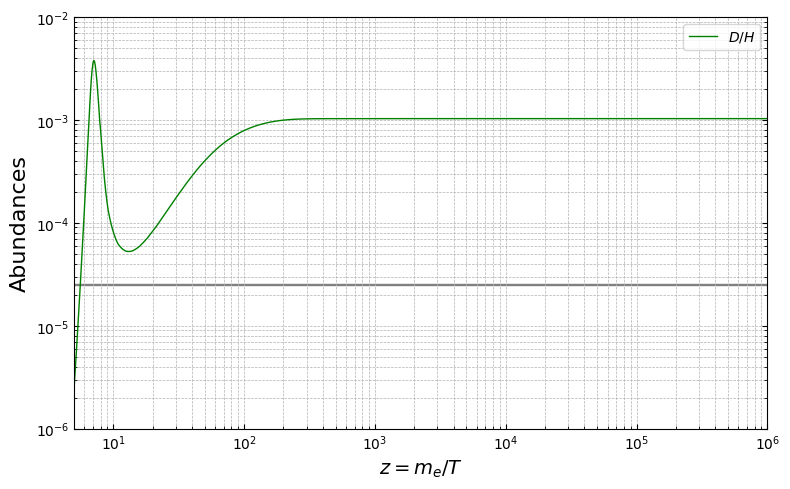

In [143]:

using PyPlot



# Create the figure and axis
fig, ax = subplots(figsize=(8, 5))

# Plot the data with customizations
#=
ax.plot(
    z_val, xn_val ./ xp_val , linewidth=1, label=L"$n$", color="blue"
)
ax.plot(
    z_val, xp_val, linewidth=1, label=L"$p$", color="red"
)
=#

ax.plot(
    z_val, xd_val  ./ xp_val, linewidth=1, label=L"$D/H$", color="green"
)

#=
ax.plot(
    z_val, x3h_val ./ xp_val , linewidth=1, label=L"$^{3}H/H$", color="purple"
)

ax.plot(
    z_val, x3he_val ./ xp_val, linewidth=1, label=L"$^{3}He/H$", color="orange"
)
=#

#=
ax.plot(
    z_val,4.03297992538*x4he_val, linewidth=1, label=L"$Y_{p}$", color="deeppink"
)
=#

ax.fill_between([5,10^6],2.497e-5,2.557e-5,color="gray")
# Set scale to logarithmic
ax.set_yscale("log")
ax.set_xscale("log")

# Labeling and legend
ax.set_xlabel(L"$z=m_e/T}$", size=14,fontweight="bold")
ax.set_ylabel("Abundances", size=16)
ax.set_yticks([1e-6,1e-5,1e-4,1e-3,1e-2])
#ax.set_xticks([0.3,1e+0,51])
#ax.set_title("BBN Abundances", size=14,fontweight="bold")

# Add a grid
ax.grid("True", which="both", linestyle="--", linewidth=0.5)
ax.tick_params(axis="both", which="both", direction="in", right=true)
ax.set_ylim(1e-6,0.01)
ax.set_xlim(5,10^6)
ax.legend()
fig.tight_layout()
#fig.savefig("bbn.svg")



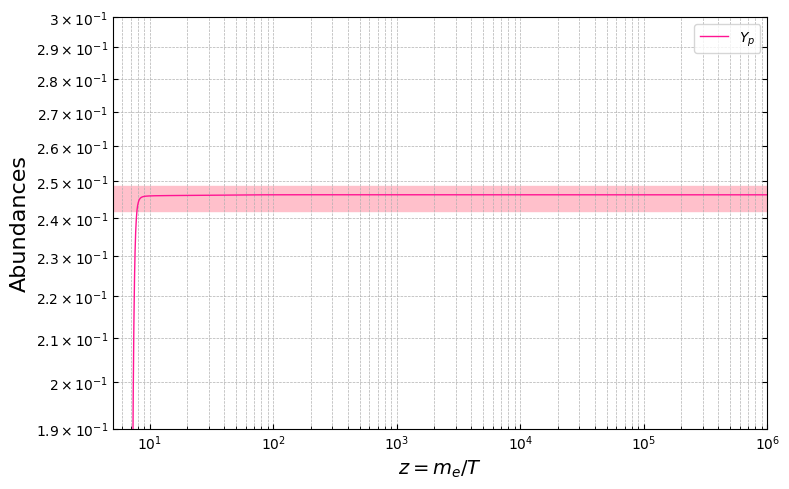

In [146]:
using PyPlot

# Create the figure and axis
fig, ax = subplots(figsize=(8, 5))

# Plot the data with customizations
ax.plot(
    z_val,4.002602*x4he_val, linewidth=1, label=L"$Y_{p}$", color="deeppink"
)

ax.fill_between([5,10^6],0.2419,0.2487,color="pink")

# Set scale to logarithmic
ax.set_yscale("log")
ax.set_xscale("log")

# Labeling and legend
ax.set_xlabel(L"$z=m_e/T$", size=14,fontweight="bold")
ax.set_ylabel("Abundances", size=16)
ax.set_yticks([0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30])
ax.grid("True", which="both", linestyle="--", linewidth=0.5)
ax.tick_params(axis="both", which="both", direction="in", right=true)
ax.set_ylim(0.19,0.30)
ax.set_xlim(5,10^6)
ax.legend()
fig.tight_layout()



In [ ]:
function pn_gammaD_andlo(z)
    T = m_e / z
    T_9 = mev_to_t9kelvin(T)
    # nb = 6.14e-10 * 410.73 * (T / 2.7255) ^ 3
    NA = 6.022e23
    if T_9 <= 1.5
        f = (44216. * (1 + 3.75191 * T_9 + 1.92934 * T_9^2 + 0.746503 * T_9^3 + 0.0197023 * T_9^4 + 3.00491e-6 * T_9^5) / (1 + 5.4678 * T_9 + 5.62395 * T_9^2 + 0.489312 * T_9^3 + 0.00747806 * T_9^4))
    else
        f = (1. - sqrt(T_9) * 0.8504 + T_9 * 0.4895 - T_9^(3/2) * 0.09623 + T_9 * 0.008471 * T_9 - T_9 * 2.8e-4 * T_9^(3/2)) * 47420
    end
    rate = f
    return n_b(z) * rate / NA
end


function DD_n3He_alcoc(z)
    T9 = mev_to_t9kelvin(m_e / z)
    if T9 < 0.001
        rate = 1.142e-8
    elseif 0.001 <= T9 <= 0.0015
        rate = 1.142e-8
    elseif 0.0015 < T9 <= 0.0025
        rate = 5.470e-5
    elseif 0.0025 < T9 <= 0.0035
        rate = 3.021e-3
    elseif 0.0035 < T9 <= 0.0045
        rate = 3.732e-2
    elseif 0.0045 < T9 <= 0.0055
        rate = 2.212e-1
    elseif 0.0055 < T9 <= 0.0065
        rate = 8.546e-1
    elseif 0.0065 < T9 <= 0.0075
        rate = 2.505
    elseif 0.0075 < T9 <= 0.0085
        rate = 6.066
    elseif 0.0085 < T9 <= 0.0095
        rate = 1.278e1
    elseif 0.0095 < T9 <= 0.0105
        rate = 2.424e1
    elseif 0.0105 < T9 <= 0.0115
        rate = 4.237e1
    elseif 0.0115 < T9 <= 0.0125
        rate = 6.936e1
    elseif 0.0125 < T9 <= 0.0135
        rate = 1.077e2
    elseif 0.0135 < T9 <= 0.0145
        rate = 1.600e2
    elseif 0.0145 < T9 <= 0.0155
        rate = 2.291e2
    elseif 0.0155 < T9 <= 0.0170
        rate = 3.179e2
    elseif 0.0170 < T9 <= 0.0190
        rate = 5.667e2
    elseif 0.0190 < T9 <= 0.0225
        rate = 9.310e2
    elseif 0.0225 < T9 <= 0.0275
        rate = 2.504e3
    elseif 0.0275 < T9 <= 0.0350
        rate = 5.301e3
    elseif 0.0350 < T9 <= 0.0450
        rate = 1.568e4
    elseif 0.0450 < T9 <= 0.0550
        rate = 3.369e4
    elseif 0.0550 < T9 <= 0.0650
        rate = 6.013e4
    elseif 0.0650 < T9 <= 0.0750
        rate = 9.527e4
    elseif 0.0750 < T9 <= 0.0850
        rate = 1.390e5
    elseif 0.0850 < T9 <= 0.0950
        rate = 1.912e5
    elseif 0.0950 < T9 <= 0.1050
        rate = 2.513e5
    elseif 0.1050 < T9 <= 0.1150
        rate = 3.190e5
    elseif 0.1150 < T9 <= 0.1250
        rate = 3.938e5
    elseif 0.1250 < T9 <= 0.1350
        rate = 4.753e5
    elseif 0.1350 < T9 <= 0.1450
        rate = 5.631e5
    elseif 0.1450 < T9 <= 0.1550
        rate = 6.568e5
    elseif 0.1550 < T9 <= 0.1700
        rate = 7.559e5
    elseif 0.1700 < T9 <= 0.1900
        rate = 9.691e5
    elseif 0.1900 < T9 <= 0.2250
        rate = 1.200e6
    elseif 0.2250 < T9 <= 0.2750
        rate = 1.842e6
    elseif 0.2750 < T9 <= 0.3250
        rate = 2.555e6
    elseif 0.3250 < T9 <= 0.3750
        rate = 3.318e6
    elseif 0.3750 < T9 <= 0.4250
        rate = 4.119e6
    elseif 0.4250 < T9 <= 0.4750
        rate = 4.946e6
    elseif 0.4750 < T9 <= 0.5500
        rate = 5.792e6
    elseif 0.5500 < T9 <= 0.6500
        rate = 7.517e6
    elseif 0.6500 < T9 <= 0.7500
        rate = 9.260e6
    elseif 0.7500 < T9 <= 0.8500
        rate = 1.100e7
    elseif 0.8500 < T9 <= 0.9500
        rate = 1.272e7
    elseif 0.9500 < T9 <= 1.1250
        rate = 1.442e7
    elseif 1.1250 < T9 <= 1.3750
        rate = 1.850e7
    elseif 1.3750 < T9 <= 1.6250
        rate = 2.235e7
    elseif 1.6250 < T9 <= 1.8750
        rate = 2.595e7
    elseif 1.8750 < T9 <= 2.2500
        rate = 2.932e7
    elseif 2.2500 < T9 <= 2.7500
        rate = 3.546e7
    elseif 2.7500 < T9 <= 3.2500
        rate = 4.093e7
    elseif 3.2500 < T9 <= 3.7500
        rate = 4.585e7
    elseif 3.7500 < T9 <= 4.5000
        rate = 5.031e7
    elseif 4.5000 < T9 <= 5.5000
        rate = 5.816e7
    elseif 5.5000 < T9 <= 6.5000
        rate = 6.488e7
    elseif 6.5000 < T9 <= 7.5000
        rate = 7.072e7
    elseif 7.5000 < T9 <= 8.5000
        rate = 7.583e7
    elseif 8.5000 < T9 <= 9.5000
        rate = 8.037e7
    elseif 9.5000 < T9 <= 10.0000
        rate = 8.437e7
    else
        rate = 0.0
    end
    rate = rate
    return n_b(z) * rate / NA
end


function DD_p3H_alcoc(z)
    T = m_e / z
    T9 = mev_to_t9kelvin(T)
    NA = 6.022e23
    if T9 < 0.001
        rate = 1.173e-8
    elseif 0.001 <= T9 <= 0.0015
        rate = 1.173e-8
    elseif 0.0015 < T9 <= 0.0025
        rate = 5.609e-5
    elseif 0.0025 < T9 <= 0.0035
        rate = 3.092e-3
    elseif 0.0035 < T9 <= 0.0045
        rate = 3.814e-2
    elseif 0.0045 < T9 <= 0.0055
        rate = 2.257e-1
    elseif 0.0055 < T9 <= 0.0065
        rate = 8.707e-1
    elseif 0.0065 < T9 <= 0.0075
        rate = 2.549
    elseif 0.0075 < T9 <= 0.0085
        rate = 6.164
    elseif 0.0085 < T9 <= 0.0095
        rate = 1.297e1
    elseif 0.0095 < T9 <= 0.0105
        rate = 2.458e1
    elseif 0.0105 < T9 <= 0.0115
        rate = 4.290e1
    elseif 0.0115 < T9 <= 0.0125
        rate = 7.016e1
    elseif 0.0125 < T9 <= 0.0135
        rate = 1.088e2
    elseif 0.0135 < T9 <= 0.0145
        rate = 1.615e2
    elseif 0.0145 < T9 <= 0.0155
        rate = 2.310e2
    elseif 0.0155 < T9 <= 0.0170
        rate = 3.202e2
    elseif 0.0170 < T9 <= 0.0190
        rate = 5.698e2
    elseif 0.0190 < T9 <= 0.0225
        rate = 9.343e2
    elseif 0.0225 < T9 <= 0.0275
        rate = 2.502e3
    elseif 0.0275 < T9 <= 0.0350
        rate = 5.276e3
    elseif 0.0350 < T9 <= 0.0450
        rate = 1.549e4
    elseif 0.0450 < T9 <= 0.0550
        rate = 3.307e4
    elseif 0.0550 < T9 <= 0.0650
        rate = 5.868e4
    elseif 0.0650 < T9 <= 0.0750
        rate = 9.246e4
    elseif 0.0750 < T9 <= 0.0850
        rate = 1.343e5
    elseif 0.0850 < T9 <= 0.0950
        rate = 1.837e5
    elseif 0.0950 < T9 <= 0.1050
        rate = 2.404e5
    elseif 0.1050 < T9 <= 0.1150
        rate = 3.039e5
    elseif 0.1150 < T9 <= 0.1250
        rate = 3.737e5
    elseif 0.1250 < T9 <= 0.1350
        rate = 4.493e5
    elseif 0.1350 < T9 <= 0.1450
        rate = 5.304e5
    elseif 0.1450 < T9 <= 0.1550
        rate = 6.165e5
    elseif 0.1550 < T9 <= 0.1700
        rate = 7.072e5
    elseif 0.1700 < T9 <= 0.1900
        rate = 9.011e5
    elseif 0.1900 < T9 <= 0.2250
        rate = 1.110e6
    elseif 0.2250 < T9 <= 0.2750
        rate = 1.682e6
    elseif 0.2750 < T9 <= 0.3250
        rate = 2.309e6
    elseif 0.3250 < T9 <= 0.3750
        rate = 2.974e6
    elseif 0.3750 < T9 <= 0.4250
        rate = 3.663e6
    elseif 0.4250 < T9 <= 0.4750
        rate = 4.371e6
    elseif 0.4750 < T9 <= 0.5500
        rate = 5.089e6
    elseif 0.5500 < T9 <= 0.6500
        rate = 6.543e6
    elseif 0.6500 < T9 <= 0.7500
        rate = 8.001e6
    elseif 0.7500 < T9 <= 0.8500
        rate = 9.448e6
    elseif 0.8500 < T9 <= 0.9500
        rate = 1.087e7
    elseif 0.9500 < T9 <= 1.1250
        rate = 1.228e7
    elseif 1.1250 < T9 <= 1.3750
        rate = 1.565e7
    elseif 1.3750 < T9 <= 1.6250
        rate = 2.882e7
    elseif 1.6250 < T9 <= 1.8750
        rate = 2.181e7
    elseif 1.8750 < T9 <= 2.2500
        rate = 2.461e7
    elseif 2.2500 < T9 <= 2.7500
        rate = 2.976e7
    elseif 2.7500 < T9 <= 3.2500
        rate = 3.440e7
    elseif 3.2500 < T9 <= 3.7500
        rate = 3.863e7
    elseif 3.7500 < T9 <= 4.5000
        rate = 4.251e7
    elseif 4.5000 < T9 <= 5.5000
        rate = 4.946e7
    elseif 5.5000 < T9 <= 6.5000
        rate = 5.552e7
    elseif 6.5000 < T9 <= 7.5000
        rate = 6.077e7
    elseif 7.5000 < T9 <= 8.5000
        rate = 6.529e7
    elseif 8.5000 < T9 <= 9.5000
        rate = 6.912e7
    elseif 9.5000 < T9 <= 10.0000
        rate = 7.228e7
    else
        rate = 0.0
    end
    rate = n_b(z) * rate / NA
    return rate
end



DD_p3H_alcoc (generic function with 1 method)

In [ ]:
"""
function DD_n3He_alcoc(z)
    T = m_e / z
    T_9 = mev_to_t9kelvin(T)
    NA = 6.022e23
    rate = (T_9^(-2/3)) * exp(-T_9^(-1/3)) * (
        -1.84664e6 + 1.22986e7 * T_9^(1/3) - 1.3761e7 * T_9^(2/3) - 6.11628e7 * T_9
        + 1.3329e8 * T_9^(4/3) - 1.24333e7 * T_9^(5/3) - 2.72404e7 * T_9^2
        + 8.52947e6 * T_9^(7/3) + 2.2519e6 * T_9^(8/3) - 2.31204e6 * T_9^3
        - 294342 * T_9^(10/3) + 911550 * T_9^(11/3) - 252211 * T_9^4
    )

    return (n_b(z) * rate / NA)
end


function DD_p3H_alcoc(z)
    T = m_e / z
    T_9 = mev_to_t9kelvin(T)
    rhob = 2.12e-4 * T_9^3
    t9 = mev_to_t9kelvin(m_e / z)
    NA = 6.022e23
    t913 = t9^(1/3)
    t923 = t9^(2/3)
    t943 = t9^(4/3)
    t953 = t9^(5/3)

    rate = 3.91889e8 * t9^(-2/3) * exp(-4.2586 / t913) * (
        1 + 0.309233 * t913 - 0.337260 * t923 +
        2.51922 * t9 - 2.79097 * t943 + 2.16082 * t953 -
        0.976181 * t9^2 + 0.210883 * t943 * t9 -
        0.0169027 * t953 * t9 + 7.845538e-6 * t9^3
    )

    return (n_b(z) * rate / NA)
end
"""

"function DD_n3He_alcoc(z)\n    T = m_e / z\n    T_9 = mev_to_t9kelvin(T)\n    NA = 6.022e23\n    rate = (T_9^(-2/3)) * exp(-T_9^(-1/3)) * (\n        -1.84664e6 + 1.22986e7 * T_9^(1/3) - 1.3761e7 * T_9^(2/3) - 6.11628e7 * T_9\n        + 1.3329e8 * T_9^(4/3) - 1.24333e7 * T_9^(5/3) - 2.72404e7 * T_9^2\n        + 8.52947e6 * T_9^(7/3) + 2.2519e6 * T" ⋯ 340 bytes ⋯ " = t9^(4/3)\n    t953 = t9^(5/3)\n\n    rate = 3.91889e8 * t9^(-2/3) * exp(-4.2586 / t913) * (\n        1 + 0.309233 * t913 - 0.337260 * t923 +\n        2.51922 * t9 - 2.79097 * t943 + 2.16082 * t953 -\n        0.976181 * t9^2 + 0.210883 * t943 * t9 -\n        0.0169027 * t953 * t9 + 7.845538e-6 * t9^3\n    )\n\n    return (n_b(z) * rate / NA)\nend\n"

In [ ]:
function gammaD_pn(z)
    term1 = (Xp_in(z) * Xn_in(z)) / Xi(z, 3, 2, 0.511, 938.27, 940.6, 1875.62, 6.13832e-10,6.86, 1)
    reverse_rate = term1 * pn_gammaD_andlo(z)
    return reverse_rate
end


gammaD_pn (generic function with 1 method)

In [ ]:

function threegamma_1two(sigma_v_ab, T_9, A1, A2, A3, ga, gb, gc, Q)
    c_gamma = 9.8686 * 10^9 * T_9^(3/2) * (A1 * A2 / A3) * (ga * gb / gc) * exp(-11.605 * Q / T_9)
    ngamma_sigma_v_cgamma = sigma_v_ab * c_gamma
    return ngamma_sigma_v_cgamma
end


threegamma_1two (generic function with 2 methods)

In [ ]:
"""
function gammaD_pn(z)
    value1 = pn_gammaD(z)
    T_9 = mev_to_t9kelvin(z)
    A1 = 1.00727
    A2 = 1.00866
    A3 = 2.01410
    ga = 2
    gb = 2
    gc = 3
    Q = 1.7135810198702273
    value1 = value1
    rate1r = threegamma_1two(value1, T_9, A1, A2, A3, ga, gb, gc, Q)
    return rate1r
end
"""

"function gammaD_pn(z)\n    value1 = pn_gammaD(z)\n    T_9 = mev_to_t9kelvin(z)\n    A1 = 1.00727\n    A2 = 1.00866\n    A3 = 2.01410\n    ga = 2\n    gb = 2\n    gc = 3\n    Q = 1.7135810198702273\n    value1 = value1\n    rate1r = threegamma_1two(value1, T_9, A1, A2, A3, ga, gb, gc, Q)\n    return rate1r\nend\n"

In [ ]:
function xp_dot(z, xn, xp, xd)
    value = (lambda_np(z) * xn - lambda_pn(z) * xp + (gammaD_pn(z) * xd - pn_gammaD_andlo(z) * xp * xn)
              + ((DD_p3H_alcoc(z) * xd ^ 2) / 2 )) * dt_dz(z)
    return value
end

function xn_dot(z, xn, xp, xd)
    value = (lambda_pn(z) * xp - lambda_np(z) * xn + (gammaD_pn(z) * xd - pn_gammaD_andlo(z) * xp * xn)
             + ((DD_n3He_alcoc(z) * xd ^ 2) / 2 )) * dt_dz(z)
    return value
end

function xd_dot(z, xn, xp, xd)
    value = ((pn_gammaD_andlo(z) * xp * xn - gammaD_pn(z) * xd) - 2 * (((DD_p3H_alcoc(z) * xd ^ 2) / 2 ) + ((DD_n3He_alcoc(z) * xd ^ 2) / 2))) * dt_dz(z)
    return value
end

function x4he_dot(z, xd)
    value = ((((DD_p3H_alcoc(z) * xd ^ 2) / 2 ) + ((DD_n3He_alcoc(z) * xd ^ 2) / 2))) * dt_dz(z)
    return value
end

x4he_dot (generic function with 1 method)

In [ ]:

function small_network(u, p, z)
    xn, xp, xd, x4he = u
    dx_n = xn_dot(z,u[1],u[2],u[3])  # Define the equation for dx/dt here based on x, y, and t
    dx_p = xp_dot(z,u[1],u[2],u[3])
    dx_d = xd_dot(z,u[1],u[2],u[3])
    dx_4he=x4he_dot(z,u[3])
    [dx_n,dx_p,dx_d,dx_4he] # Define the equation for dy/dt here based on x, y, and t
end



small_network (generic function with 1 method)

In [ ]:

x1_0=Xn_in(minimum(z_evolve))
x2_0=Xp_in(minimum(z_evolve))
x3_0=Xi(minimum(z_evolve), 3, 2, 0.511, 938.27, 940.6, 1875.62, 6.13832e-10, 6.86, 1)
x4_h0=Xi(minimum(z_evolve), 1, 4, 0.511, 938.27, 940.6, 3728.42, 6.13832e-10, 53.32, 2)


2.42419955103104e-38

In [ ]:
xd0 = Xi(minimum(z_evolve), 3, 2, 0.511, 938.27, 940.6, 1875.62, 6.13832e-10, 6.86, 1)
x3h0 = Xi(minimum(z_evolve), 2, 3, 0.511, 938.27, 940.6, 2809.45, 6.13832e-10, 16.63, 1)
x3he0 = Xi(minimum(z_evolve), 2, 3, 0.511, 938.27, 940.6, 2809.431, 6.13832e-10, 13.11, 2)
x4he0 = Xi(minimum(z_evolve), 1, 4, 0.511, 938.27, 940.6, 3728.42, 6.13832e-10, 53.32, 2)

2.42419955103104e-38

In [ ]:
x4_h0

2.42419955103104e-38

In [ ]:
z_iterate = []
for i in znu
    if mev_to_t9kelvin(m_e / i) < 10
        push!(z_iterate, i)
    end
end


In [ ]:
Pkg.add("DifferentialEquations")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [ ]:
using Pkg
Pkg.add("Sundials")
using Sundials

   Resolving package versions...
    Updating `~/.julia/environments/v1.9/Project.toml`
  [c3572dad] + Sundials v4.23.1
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [ ]:
Pkg.add("LSODA")

   Resolving package versions...
   Installed LSODA_jll ─ v0.1.2+0
   Installed LSODA ───── v0.7.5
    Updating `~/.julia/environments/v1.9/Project.toml`
  [7f56f5a3] + LSODA v0.7.5
    Updating `~/.julia/environments/v1.9/Manifest.toml`
  [7f56f5a3] + LSODA v0.7.5
  [aae0fff6] + LSODA_jll v0.1.2+0
Precompiling project...
  ✓ LSODA_jll
  ✓ LSODA
  2 dependencies successfully precompiled in 8 seconds. 240 already precompiled.


In [ ]:

using DifferentialEquations, BenchmarkTools
u20=[x1_0,x2_0,x3_0,x4_h0]
tspan = (minimum(znu),maximum(znu))
prob2 = ODEProblem(small_network, u20, tspan)
@btime solve(prob2,FBDF(),reltol=1e-8);


  51.848 ms (775316 allocations: 15.22 MiB)


In [ ]:
sol2=solve(prob2,FBDF(),reltol=1e-8)

retcode: Success
Interpolation: 3rd order Hermite
t: 294-element Vector{Float64}:
  0.051099997600057595
  0.0510999976000647
  0.051099997608574185
  0.051099997903064145
  0.051099999635499875
  0.05110006862400146
  0.051100377691506466
  0.051100832198833726
  0.05110136771126628
  0.05110264274230762
  0.0511044885846497
  0.05110666752827478
  0.05110884647189986
  ⋮
  7.130919415525078
  7.552441603649072
  8.116406839695621
  8.898080428376211
  9.852835099226269
 11.41205069318326
 13.59727058561927
 16.811581167780176
 21.597973139473126
 29.120624392260282
 41.95653014745879
 50.63151395438075
u: 294-element Vector{Vector{Float64}}:
 [0.46772419255546166, 0.5322758074445384, 1.9342860429778275e-12, 2.42419955103104e-38]
 [0.46772419255447073, 0.5322758074455294, 1.9342861472563696e-12, 2.42419955103104e-38]
 [0.4677241913677556, 0.5322758086322446, 1.9342861464336488e-12, 2.42419955103104e-38]
 [0.46772415029936193, 0.5322758497006382, 1.9342861130230698e-12, 2.4241995510310

In [ ]:
z_values2 = sol2.t
xn_values2 = sol2[1, :]
xp_values2= sol2[2, :]
xd_values2= sol2[3, :]
x4he_values2=sol2[4, :]

294-element Vector{Float64}:
 2.42419955103104e-38
 2.42419955103104e-38
 2.42419955103104e-38
 2.42419955103104e-38
 2.42419955103104e-38
 2.42419955102994e-38
 2.424199551033909e-38
 2.424199551034176e-38
 2.4241995510345134e-38
 2.4241995510195637e-38
 2.424199551013696e-38
 2.42419955100647e-38
 2.424199551003426e-38
 ⋮
 0.09867210407567784
 0.09867355602807273
 0.09867480911819124
 0.09867573595885687
 0.09867651369639995
 0.09867728497342643
 0.09867790575354937
 0.09867838727053409
 0.09867874108881625
 0.09867901895662146
 0.09867925531231171
 0.09867930080331513

In [ ]:
x4he_values2

294-element Vector{Float64}:
 2.42419955103104e-38
 2.42419955103104e-38
 2.42419955103104e-38
 2.42419955103104e-38
 2.42419955103104e-38
 2.42419955102994e-38
 2.424199551033909e-38
 2.424199551034176e-38
 2.4241995510345134e-38
 2.4241995510195637e-38
 2.424199551013696e-38
 2.42419955100647e-38
 2.424199551003426e-38
 ⋮
 0.09867210407567784
 0.09867355602807273
 0.09867480911819124
 0.09867573595885687
 0.09867651369639995
 0.09867728497342643
 0.09867790575354937
 0.09867838727053409
 0.09867874108881625
 0.09867901895662146
 0.09867925531231171
 0.09867930080331513

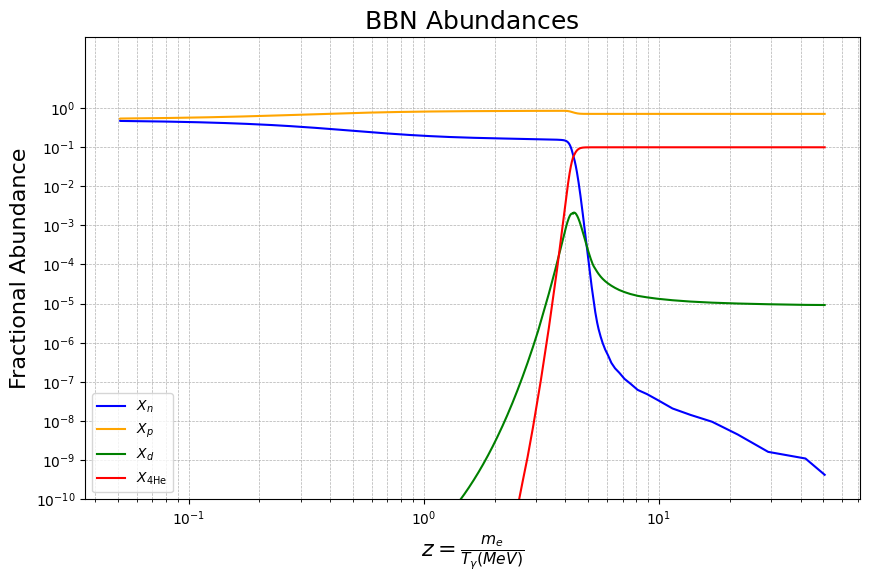

In [ ]:
# Assuming you have already defined your data arrays z_values2, xn_values2, xp_values2, xd_values2, x4he_values2
using PyPlot

# Assuming you have already defined your data arrays z_values2, xn_values2, xp_values2, xd_values2, x4he_values2

# Increase the figure size
fig, ax = subplots(figsize=(10, 6))  # Adjust the size as needed

# Plot the data with labels and custom colors
ax.plot(z_values2, xn_values2, label=L"X_n", color="blue")
ax.plot(z_values2, xp_values2, label=L"X_p", color="orange")
ax.plot(z_values2, xd_values2, label=L"X_d", color="green")
ax.plot(z_values2, x4he_values2, label=L"X_{4\mathrm{He}}", color="red")

# Set x and y scales to logarithmic
ax.set_xscale("log")
ax.set_yscale("log")

# Add labels and title with LaTeX formatting
ax.set_xlabel(L"z=\frac{m_e}{T_{\gamma}(MeV)}", size=16)
ax.set_ylabel("Fractional Abundance", size=16)
ax.set_title(L"\mathrm{BBN\ Abundances}", size=18)

# Add a grid
ax.grid("True", which="both", linestyle="--", linewidth=0.5)
ax.set_ylim(1e-10)
ax.set_yticks([1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1])

# Add a legend
ax.legend()

# Display the plot
show()




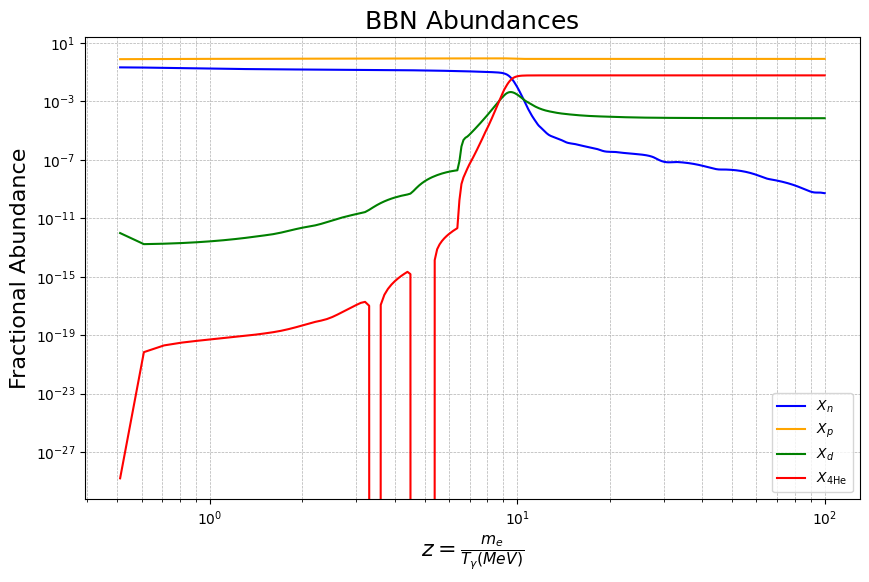